# Titanic: Machine Learning from Disaster
This jupyter notebook is just a recitation of this kaggle notebook : https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy. <br>
All credits goes to [ldfreeman3](https://www.kaggle.com/ldfreeman3)

## How a Data Scientist Beat the Odds
### A Data Science framework
1. Define the problem
2. Gather the data
3. Prepare Data for Consumption
4. Perform exploratory analysis
5. Model Data
6. Validate and implement Data Model
7. Optimize and strategize

## 3. Prepare Data for Consumption

In [1]:
TITANIC_TRAIN_PATH = '../datasets/titanic/train.csv'
TITANIC_TEST_PATH= '../datasets/titanic/test.csv'

### 3.1 Import Libraries

In [2]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
from IPython import display
import sklearn
import random
import time

In [3]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings in the jupyter notebook

### 3.11 Load Data Modelling Libraries

In [4]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [7]:
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

### 3.2 Meet and Greet Data

In [8]:
data_raw = pd.read_csv(TITANIC_TRAIN_PATH)

In [9]:
data_val = pd.read_csv(TITANIC_TEST_PATH)

In [10]:
data1 = data_raw.copy(deep=True) # good practice

In [11]:
data_cleaner = [data1, data_val] # good practice

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
data1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.00,4,1,3101295,39.6875,NaN,S
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.00,0,0,312992,7.7750,NaN,S
615,616,1,2,"Herman, Miss. Alice",female,24.00,1,2,220845,65.0000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S


### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [14]:
data1.isnull().sum() # good test

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
data1.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harrison, Mr. William",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3.22 Clean Data

#### Completing

In [17]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

In [18]:
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

In [19]:
data1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
data_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### Create

In [21]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # good practice
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [22]:
data1['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Don               1
Capt              1
Sir               1
Ms                1
Jonkheer          1
the Countess      1
Mme               1
Lady              1
Name: Title, dtype: int64

In [23]:
stat_min = 10

In [24]:
title_names = (data1['Title'].value_counts() < stat_min)

In [25]:
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Major            True
Col              True
Don              True
Capt             True
Sir              True
Ms               True
Jonkheer         True
the Countess     True
Mme              True
Lady             True
Name: Title, dtype: bool

In [26]:
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x) # good practice

In [27]:
data1['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB


In [29]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Title          418 non-null object
FareBin        418 non-null category
AgeBin         418 non-null category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 46.8+ KB


In [30]:
data1.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
200,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,9.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
479,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,12.2875,S,2,0,Miss,"(7.91, 14.454]","(-0.08, 16.0]"
683,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,46.9000,S,8,0,Mr,"(31.0, 512.329]","(-0.08, 16.0]"
51,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,7.8000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"


### 3.23 Convert Formats

In [31]:
label = LabelEncoder()

In [32]:
# good practice but it can be simplify with a function
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [33]:
Target = ['Survived']

In [34]:
# pretty name/values for charts
data1_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']

In [35]:
# for algorithm calculation
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']

In [36]:
data1_xy = Target + data1_x

In [37]:
data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']

In [38]:
data1_xy_bin = Target + data1_x_bin

In [39]:
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy

In [40]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


### 3.24 Da-Double Check Cleaned Data

In [41]:
data1.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null category
AgeBin           891 non-null category
Sex_Code         891 non-null int64
Embarked_Code    891 non-null int64
Title_Code       891 non-null int64
AgeBin_Code      891 non-null int64
FareBin_Code     891 non-null int64
dtypes: category(2), float64(2), int64(11), object(4)
memory usage: 120.3+ KB


In [43]:
data_val.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: int64

In [44]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
FamilySize       418 non-null int64
IsAlone          418 non-null int64
Title            418 non-null object
FareBin          418 non-null category
AgeBin           418 non-null category
Sex_Code         418 non-null int64
Embarked_Code    418 non-null int64
Title_Code       418 non-null int64
AgeBin_Code      418 non-null int64
FareBin_Code     418 non-null int64
dtypes: category(2), float64(2), int64(11), object(6)
memory usage: 63.1+ KB


In [45]:
data1.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,891.000000,891,891,891,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,NaN,NaN,5,4,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Harrison, Mr. William",male,NaN,NaN,NaN,NaN,S,NaN,NaN,Mr,"(7.91, 14.454]","(16.0, 32.0]",NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,NaN,NaN,517,224,525,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN,1.904602,0.602694,NaN,NaN,NaN,0.647587,1.536476,2.740741,1.288440,1.497194
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN,1.613459,0.489615,NaN,NaN,NaN,0.477990,0.791503,0.896379,0.812038,1.118156
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2.000000,1.000000,0.500000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,2.000000,2.000000


### 3.25 Split Training and Testing Data

In [46]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(
    data1[data1_x_calc], data1[Target], random_state=0
)

In [47]:
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(
    data1[data1_x_bin], data1[Target], random_state=0
)

In [48]:
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(
    data1_dummy[data1_x_dummy], data1[Target], random_state=0
)

In [49]:
data1.shape

(891, 19)

In [50]:
train1_x.shape

(668, 7)

In [51]:
test1_x.shape

(223, 7)

In [52]:
train1_x_bin.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


## 4. Perform Exploratory Analysis with Statistics

In [53]:
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4       

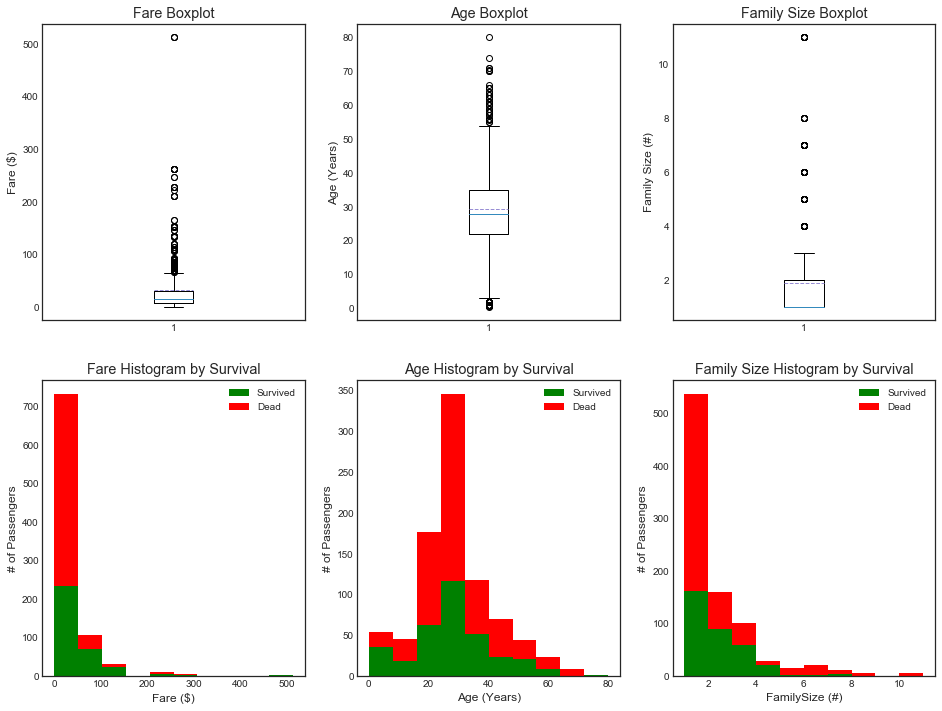

In [54]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x=data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']],
        stacked=True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']],
        stacked=True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('FamilySize (#)')
plt.ylabel('# of Passengers')
plt.legend()



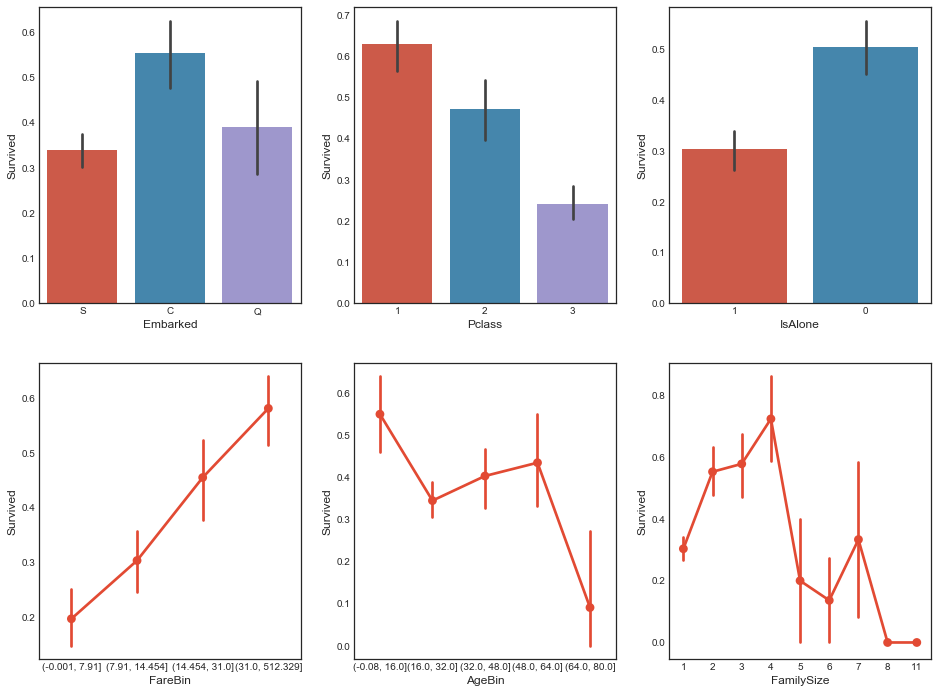

In [55]:
fig, saxis = plt.subplots(2, 3, figsize=(16,12))
sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0,0])
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1, ax=saxis[0,1])
sns.barplot(x='IsAlone', y='Survived', order=[1,0], data=data1, ax=saxis[0,2])

sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[1,0])
sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1,1])
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1,2])

Text(0.5,1,'Pclass vs FamilySize Survival Comparison')

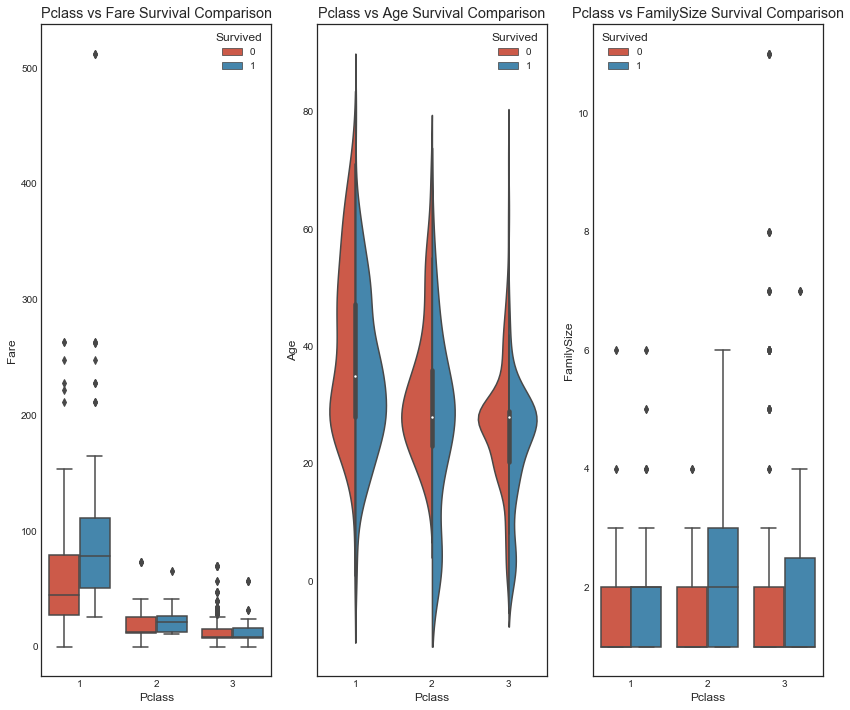

In [56]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(14,12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data1, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data1, split=True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=data1, ax=axis3)
axis3.set_title('Pclass vs FamilySize Survival Comparison')

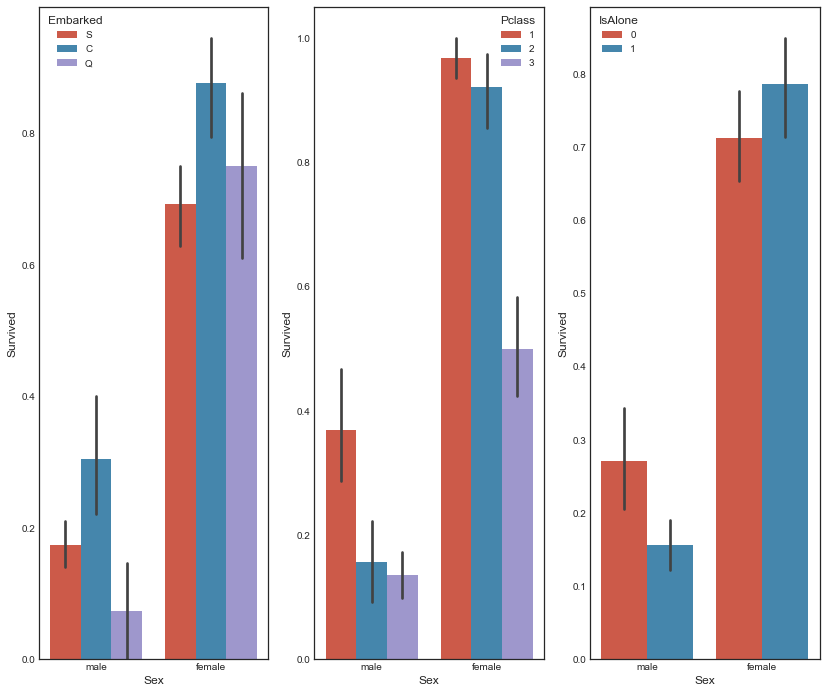

In [57]:
fig, gaxis = plt.subplots(1, 3, figsize=(14,12))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=data1, ax=gaxis[0])
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data1, ax=gaxis[1])
sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=data1, ax=gaxis[2])

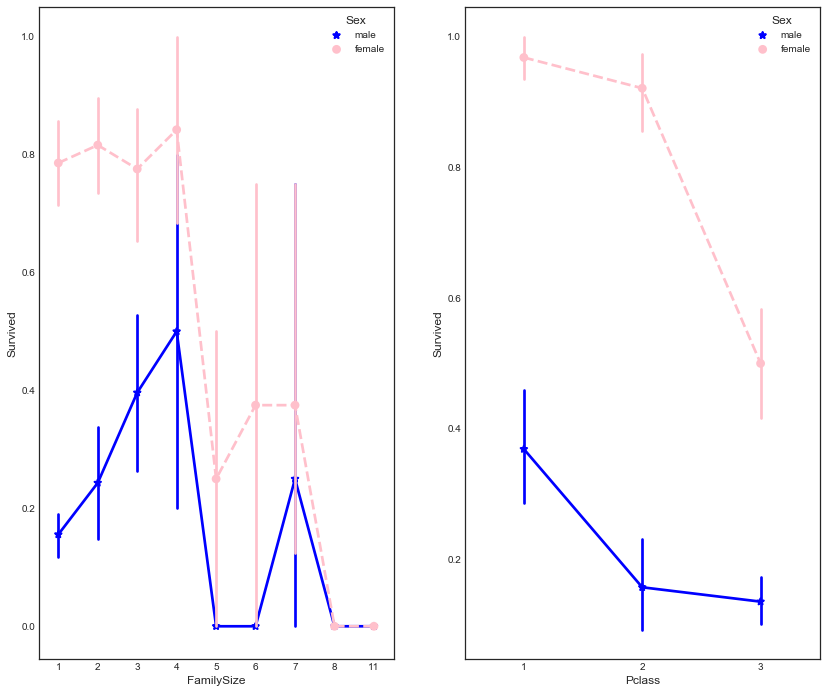

In [58]:
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14,12))

sns.pointplot(x='FamilySize', y='Survived', hue='Sex', data=data1,
             palette={'male': 'blue', 'female': 'pink'},
             markers=['*', 'o'], linestyles=['-', '--'], ax=maxis1)

sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data1,
             palette={'male': 'blue', 'female': 'pink'},
             markers=['*', 'o'], linestyles=['-', '--'], ax=maxis2)

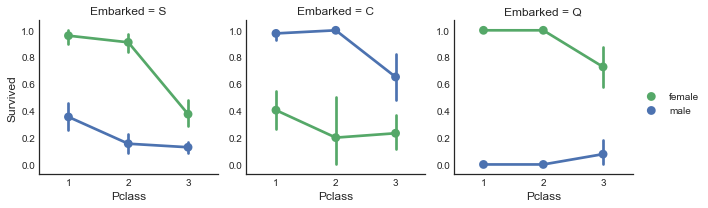

In [59]:
e = sns.FacetGrid(data1, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep')
e.add_legend()

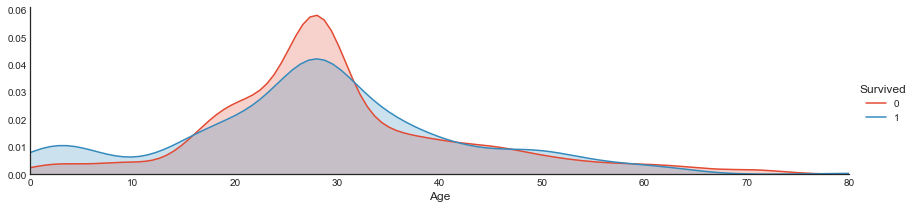

In [60]:
a = sns.FacetGrid(data1, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, data1['Age'].max()))
a.add_legend()

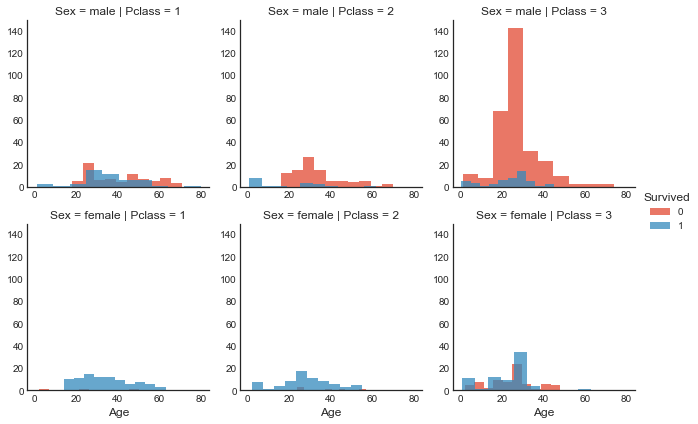

In [61]:
h = sns.FacetGrid(data1, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

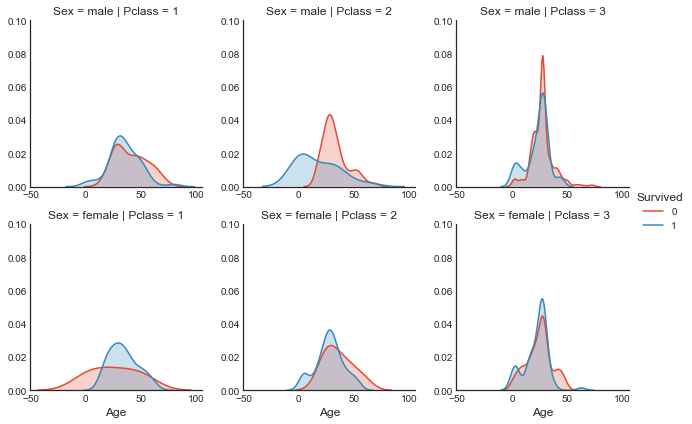

In [62]:
h = sns.FacetGrid(data1, row='Sex', col='Pclass', hue='Survived')
h.map(sns.kdeplot, 'Age', shade=True)
h.set(ylim=(0, 0.1))
h.add_legend()

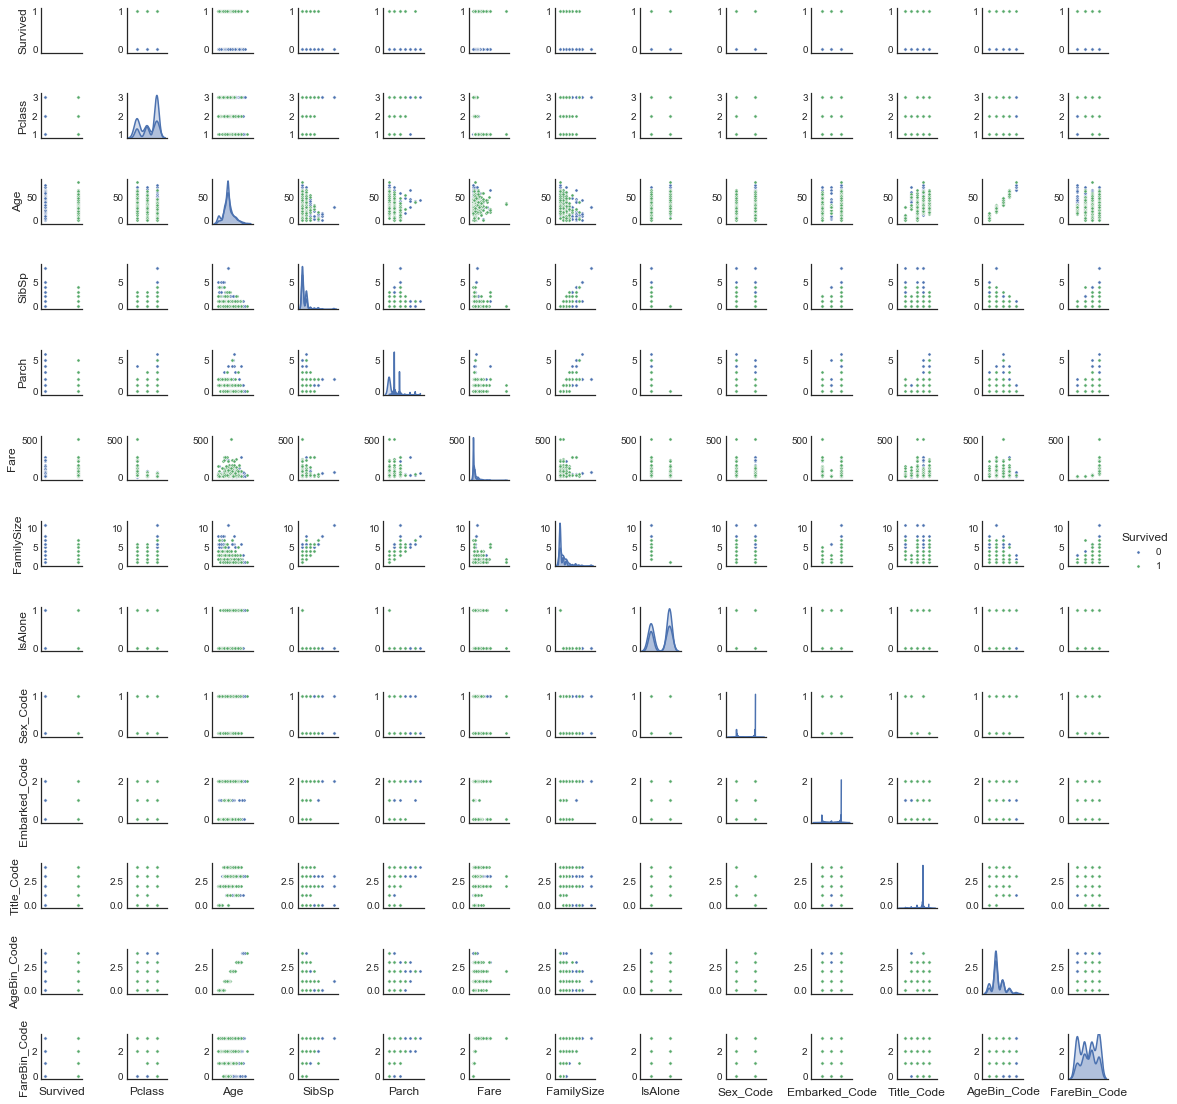

In [63]:
pp = sns.pairplot(data1, hue='Survived', palette='deep', size=1.2, diag_kind='kde',
                 diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

In [64]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14,12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 12}
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

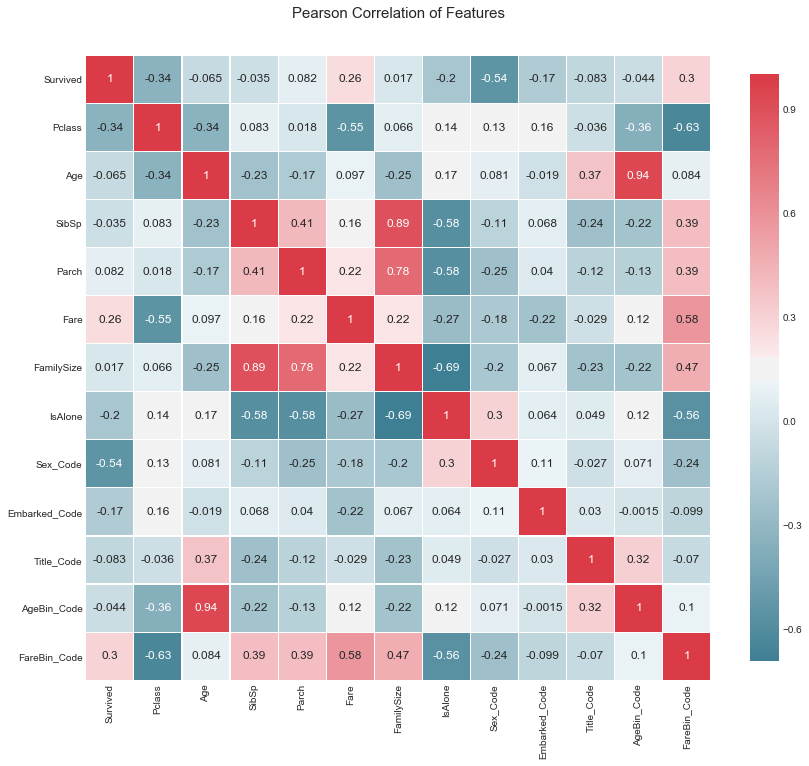

In [65]:
correlation_heatmap(data1)

## 5. Model Data

In [66]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naives Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # xgboost
    XGBClassifier(),
]

In [67]:
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)

In [68]:
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean',
              'MLA Test Accuracy 3*STD', 'MLA Time']

In [69]:
MLA_compare = pd.DataFrame(columns=MLA_columns)

In [70]:
MLA_predict = data1[Target]

In [71]:
row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv=cv_split)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

In [72]:
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.0199381
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0242656
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.89176,0.824627,0.0561936,0.0113439
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0265433
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822015,0.0529916,0.0463978
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.822015,0.0515533,0.00147786
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.820896,0.0693669,0.0104257
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.892135,0.818657,0.0560149,0.0110237
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00135839
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820412,0.81194,0.0498606,0.0523833


Text(0,0.5,'Algorithm')

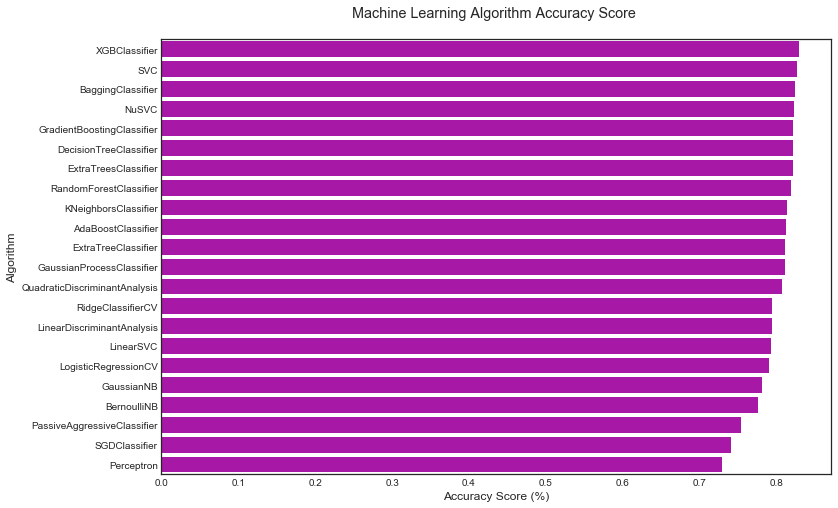

In [73]:
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color='m')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### 5.1 Evaluate Model Performance

In [74]:
for index, row in data1.iterrows():
    if random.random() > .5:
        data1.set_value(index, 'Random_Predict', 1)
    else:
        data1.set_value(index, 'Random_Predict', 0)

In [75]:
data1['Random_Score'] = 0
data1.loc[data1['Survived'] == data1['Random_Predict'], 'Random_Score'] = 1
'Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100)

'Coin Flip Model Accuracy: 48.26%'

In [76]:
'Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100)

'Coin Flip Model Accuracy w/SciKit: 48.26%'

In [77]:
pivot_female = data1[data1.Sex == 'female'].groupby(['Sex', 'Pclass', 'Embarked', 'FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n',pivot_female)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000


In [78]:
pivot_male = data1[data1.Sex == 'male'].groupby(['Sex', 'Pclass', 'Embarked', 'FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Male Node: \n',pivot_male)

Survival Decision Tree w/Male Node: 
 Sex   Pclass  Embarked  FareBin        
male  1       C         (14.454, 31.0]     0.384615
                        (31.0, 512.329]    0.413793
              Q         (31.0, 512.329]    0.000000
              S         (-0.001, 7.91]     0.000000
                        (14.454, 31.0]     0.500000
                        (31.0, 512.329]    0.302326
      2       C         (7.91, 14.454]     0.500000
                        (14.454, 31.0]     0.000000
                        (31.0, 512.329]    0.333333
              Q         (7.91, 14.454]     0.000000
              S         (-0.001, 7.91]     0.000000
                        (7.91, 14.454]     0.111111
                        (14.454, 31.0]     0.259259
                        (31.0, 512.329]    0.200000
      3       C         (-0.001, 7.91]     0.133333
                        (7.91, 14.454]     0.333333
                        (14.454, 31.0]     0.571429
              Q         (-0.001, 7.91]

In [79]:
def mytree(df):
    Model = pd.DataFrame(data={'Predict': []})
    male_title = ['Master']
    
    for index, row in df.iterrows():
        Model.loc[index, 'Predict'] = 0
    
        if (df.loc[index, 'Sex'] == 'female'):
            Model.loc[index, 'Predict'] = 1
            
        if ((df.loc[index, 'Sex'] == 'female') &
           (df.loc[index, 'Pclass'] == 3) &
           (df.loc[index, 'Embarked'] == 'S') &
           (df.loc[index, 'Fare'] > 8)
           ):
                Model.loc[index, 'Predict'] = 0
                
        if ((df.loc[index, 'Sex'] == 'Male') &
           (df.loc[index, 'Title'] in male_title)
           ):
                Model.loc[index, 'Predict'] = 1
                
    return Model

In [80]:
Tree_Predict = mytree(data1)
'Decision Tree Model Accuracy/Precision Score: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100)

'Decision Tree Model Accuracy/Precision Score: 81.37%'

In [81]:
print(metrics.classification_report(data1['Survived'], Tree_Predict))

             precision    recall  f1-score   support

          0       0.80      0.94      0.86       549
          1       0.86      0.62      0.72       342

avg / total       0.82      0.81      0.81       891



In [82]:
import itertools

In [83]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    tresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment='center', color='white' if cm[i, j] > tresh else 'black')
        
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

Confusion matrix without normalization
[[514  35]
 [131 211]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.38  0.62]]


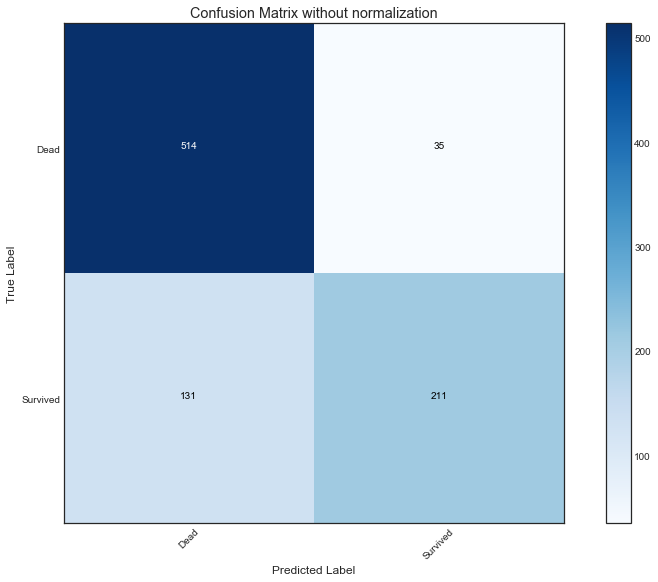

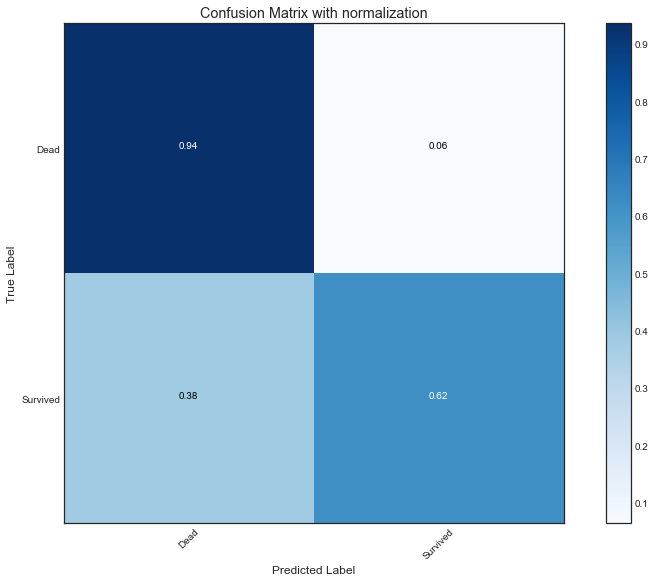

In [84]:
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Confusion Matrix with normalization')

In [85]:
dtree = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv=cv_split)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57


In [86]:
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

In [87]:
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid,
                                          scoring='roc_auc', cv=cv_split)

In [88]:
tune_model.fit(data1[data1_x_bin], data1[Target])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [89]:
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00


In [90]:
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.09
BEFORE DT RFE Test w/bin score 3*std: +/- 5.57


In [91]:
dtree_rfe = feature_selection.RFECV(dtree, step=1, scoring='accuracy', cv=cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [92]:
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv=cv_split)

In [93]:
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))

AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code' 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 83.06
AFTER DT RFE Test w/bin score 3*std: +/- 6.22


In [94]:
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid,
                                             scoring='roc_auc', cv=cv_split)
rfe_tune_model.fit(data1[X_rfe], data1[Target])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [95]:
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21


In [96]:
import graphviz

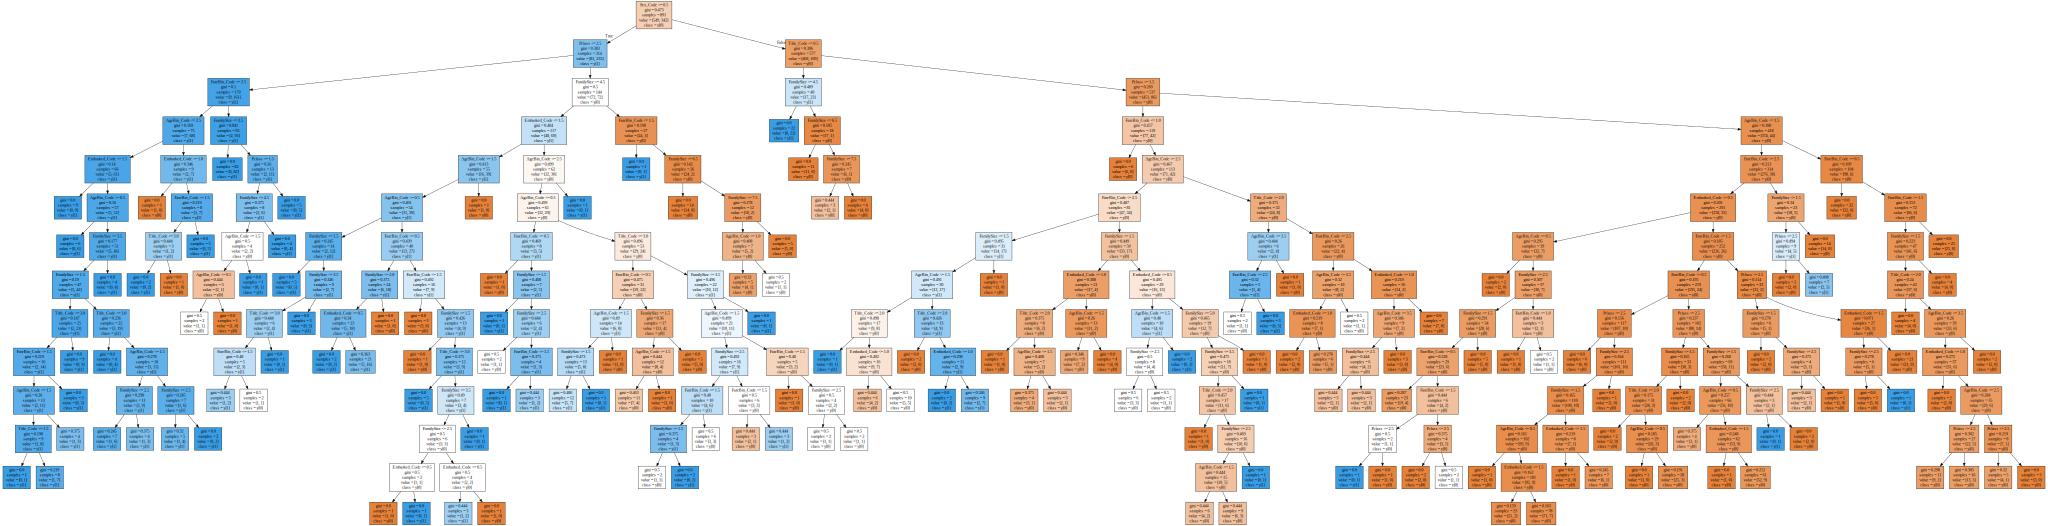

In [100]:
dot_data = tree.export_graphviz(dtree, out_file=None,
                               feature_names=data1_x_bin, class_names=True,
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph